<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откройте-файлы-и-изучите-их." data-toc-modified-id="Откройте-файлы-и-изучите-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откройте файлы и изучите их.</a></span></li><li><span><a href="#Проверка-и-вычисление-эффективности-обогащения.-MAE-между-расчётами-и-значением-признака." data-toc-modified-id="Проверка-и-вычисление-эффективности-обогащения.-MAE-между-расчётами-и-значением-признака.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка и вычисление эффективности обогащения. MAE между расчётами и значением признака.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов" data-toc-modified-id="Анализ-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов</a></span></li><li><span><a href="#Анализ-сырья" data-toc-modified-id="Анализ-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ сырья</a></span></li><li><span><a href="#Анализ-суммарной-концентрации" data-toc-modified-id="Анализ-суммарной-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суммарной концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#SMAPE" data-toc-modified-id="SMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SMAPE</a></span></li><li><span><a href="#Перебор-моделей" data-toc-modified-id="Перебор-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Перебор моделей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

###  Откройте файлы и изучите их.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
def data_read(file_path):
    data = pd.read_csv(file_path)
    display(data.head())
    display(data.info())
    print('Количество пропусков:', data.isna().sum())
    print('Количество дубликатов:', sum(data.duplicated()))
    return data

In [3]:
data_full = data_read('/datasets/gold_recovery_full.csv')
data_train = data_read('/datasets/gold_recovery_train.csv')
data_test = data_read('/datasets/gold_recovery_test.csv')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

Количество пропусков: date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64
Количество дубликатов: 0


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

Количество пропусков: date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
Количество дубликатов: 0


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

Количество пропусков: date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_su

Дубликатов нет, пропусками займемся позже. Лишних столбцов, видимо, будет много.

In [4]:
display(data_full[['rougher.output.recovery','final.output.recovery']].isna().sum())
display(data_train[['rougher.output.recovery','final.output.recovery']].isna().sum())

rougher.output.recovery    3119
final.output.recovery      1963
dtype: int64

rougher.output.recovery    2573
final.output.recovery      1521
dtype: int64

In [5]:
data_full.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
data_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
def clean(data):
    display(data.isna().sum())
    shape_0 = data.shape[0]
    print('Изначальный размер', shape_0)
    data.fillna(method='ffill', inplace=True)
    data.dropna(inplace=True)
    display(data.isna().sum())
    print('Удалено незамененных данных', shape_0 - data.shape[0])

In [8]:
clean(data_full)

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

Изначальный размер 19439


date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Удалено незамененных данных 0


In [9]:
clean(data_train)

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

Изначальный размер 14149


date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Удалено незамененных данных 0


In [10]:
clean(data_test)

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


Изначальный размер 5856


date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Удалено незамененных данных 0


### Проверка и вычисление эффективности обогащения. MAE между расчётами и значением признака.

In [11]:
# начнем с флотации
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
recovery =  (C * (F - T)) / (F * (C - T)) * 100
print(recovery.corr(data_train['rougher.output.recovery']))

1.0


Отлично, на этапе флотации все сходится.

In [13]:
recovery[recovery < 0] = 0
recovery[recovery > 100] = 0

In [14]:
print(mae(data_train['rougher.output.recovery'], recovery))

9.46896498277233e-15


Очень мало, хорошо.

### Предобработка данных

In [15]:
col_drop = [col for col in list(data_train.columns) if (col not in list(data_test.columns))]
display(col_drop)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Как видим, в test отсутствуют результаты всех стадий процесса.

In [16]:
data_train.drop(col_drop, axis=1, inplace=True)

## Анализ данных

### Анализ концентрации металлов

In [17]:
data_au = data_full[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
                     'final.output.concentrate_au']]
data_au.index = data_full['date']

data_au.isna().sum()

rougher.input.feed_au                    0
rougher.output.concentrate_au            0
primary_cleaner.output.concentrate_au    0
final.output.concentrate_au              0
dtype: int64

In [18]:
#data_au.fillna(method='ffill', inplace=True)
#data_au.isna().sum()

In [19]:
def plot(data):
    plt.figure(figsize=(12,8))
    plt.title('Изменение концентрации золота', fontsize=22)
    plt.xlabel('Концентрация золота', fontsize=16)
    plt.ylabel('Плотность', fontsize=16)
    sns.distplot(data.iloc[:,[0]], bins=10)
    sns.distplot(data.iloc[:,[1]], bins=10)
    sns.distplot(data.iloc[:,[2]], bins=10)
    sns.distplot(data.iloc[:,[3]], bins=10)
    plt.legend(labels=['rougher_input', 'rouger_output', 'primary_output', 'final_output'])

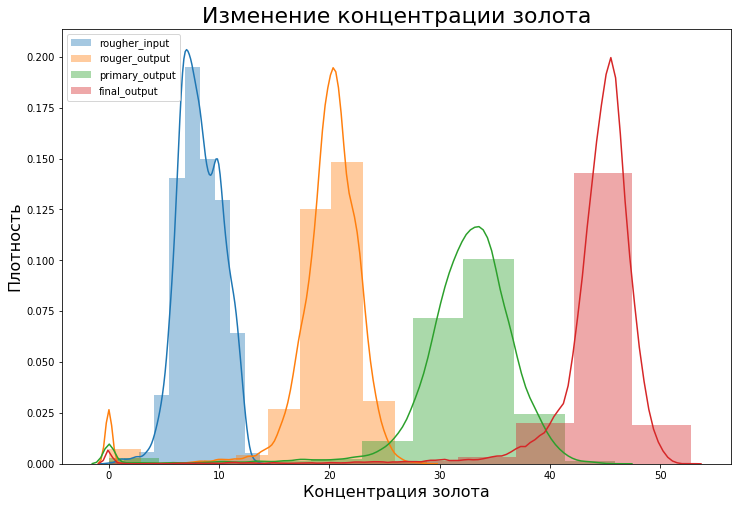

In [20]:
plot(data_au)

In [21]:
data_ag = data_full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag',
                     'final.output.concentrate_ag']]

data_pb = data_full[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
                     'final.output.concentrate_pb']]

data_ag.index = data_full['date']
data_pb.index = data_full['date']

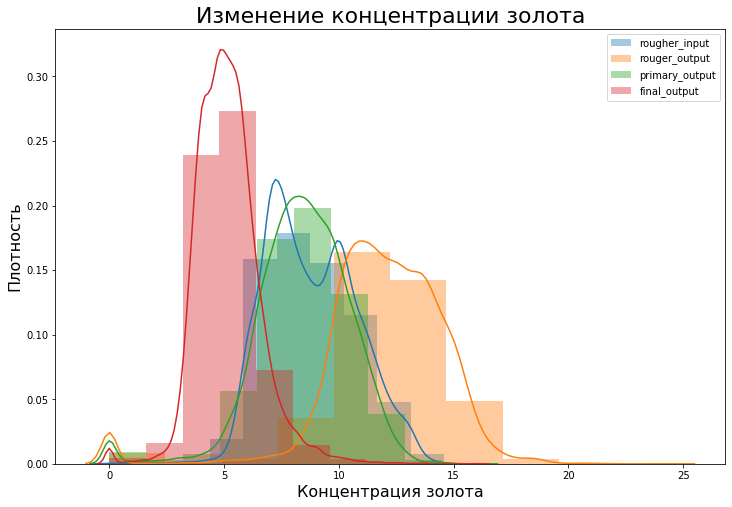

In [22]:
plot(data_ag)

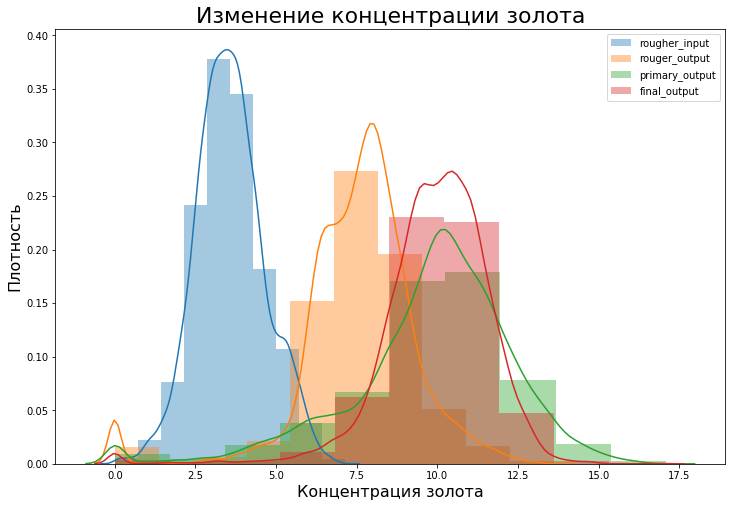

In [23]:
plot(data_pb)

Имеем выбросы, что не хорошо, но можем видеть что концентрация золота и серебра в продукте со временем растет, а свинца падает. Значит очистка золота работает правильно.

In [24]:
display(data_au[data_au['rougher.input.feed_au'] <= 0])
display(data_ag[data_ag['rougher.input.feed_ag'] <= 0])
display(data_pb[data_pb['rougher.input.feed_pb'] <= 0])

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
date,,,,


,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
date,,,,


,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
date,,,,


### Анализ сырья

In [25]:
print(data_train['rougher.input.feed_size'].isna().sum())
print(data_test['rougher.input.feed_size'].isna().sum())

0
0


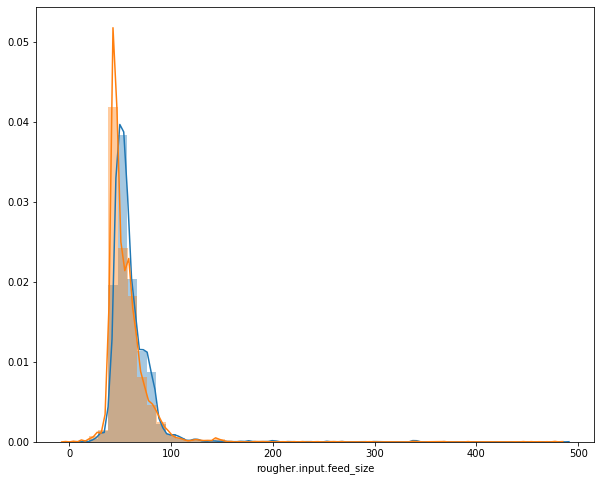

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(data_train['rougher.input.feed_size'])
sns.distplot(data_test['rougher.input.feed_size'])

Условно распределения близки.

### Анализ суммарной концентрации

In [28]:
data_full['feed_conc'] = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] +\
            data_full['rougher.input.feed_sol'] + data_full['rougher.input.feed_au']
data_full['rougher_conc'] = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] +\
            data_full['rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au']
data_full['final_conc'] = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] +\
            data_full['final.output.concentrate_sol'] + data_full['final.output.concentrate_au']

In [29]:
data_full[['feed_conc', 'rougher_conc', 'final_conc']].describe()

,feed_conc,rougher_conc,final_conc
count,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,68.653624
std,7.212680,12.491279,7.427536
min,0.040000,0.000000,0.000000
25%,53.557679,66.012495,67.932362
50%,57.594391,70.181495,69.598444
75%,61.953459,74.356904,71.368472
max,76.978947,88.140119,80.210644


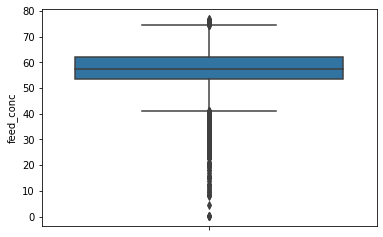

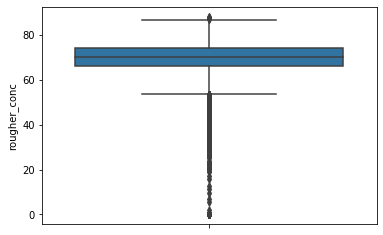

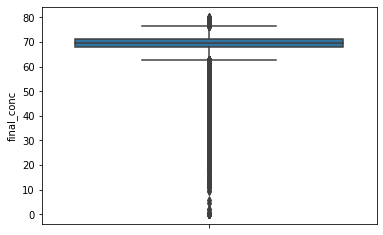

In [30]:
sns.boxplot(data_full['feed_conc'], orient='v')
plt.show()
sns.boxplot(data_full['rougher_conc'], orient='v')
plt.show()
sns.boxplot(data_full['final_conc'], orient='v')

In [31]:
import pandas as pd

pd.Series([1, 2, None]) + pd.Series([10, None, 50])

0    11.0
1     NaN
2     NaN
dtype: float64

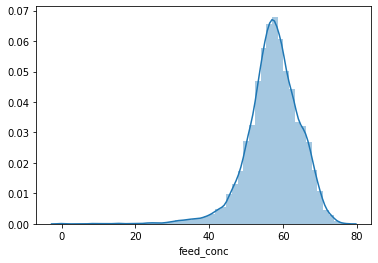

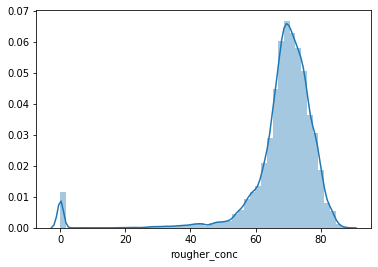

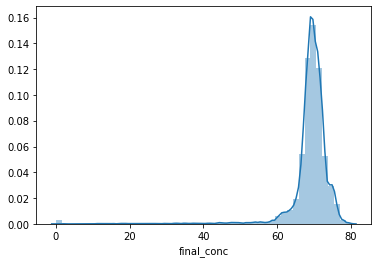

In [32]:
sns.distplot(data_full['feed_conc'])
plt.show()
sns.distplot(data_full['rougher_conc'])
plt.show()
sns.distplot(data_full['final_conc'])

Визуально распределения очень похожи, особенно первые два.

In [33]:
wh_area0 = (data_full['feed_conc'].quantile(0.75) - data_full['feed_conc'].quantile(0.25))*1.5
print(data_full['feed_conc'].quantile(0.25) - wh_area0, data_full['feed_conc'].quantile(0.75) + wh_area0)

40.964009646445604 74.54712903840603


In [34]:
data_full.query('feed_conc < 40 | feed_conc > 74').count()

date                                                  428
final.output.concentrate_ag                           428
final.output.concentrate_pb                           428
final.output.concentrate_sol                          428
final.output.concentrate_au                           428
final.output.recovery                                 428
final.output.tail_ag                                  428
final.output.tail_pb                                  428
final.output.tail_sol                                 428
final.output.tail_au                                  428
primary_cleaner.input.sulfate                         428
primary_cleaner.input.depressant                      428
primary_cleaner.input.feed_size                       428
primary_cleaner.input.xanthate                        428
primary_cleaner.output.concentrate_ag                 428
primary_cleaner.output.concentrate_pb                 428
primary_cleaner.output.concentrate_sol                428
primary_cleane

Удалять? Вряд ли. Только по этому столбцу у на 10% выбросов.

In [35]:
wh_area1 = (data_full['rougher_conc'].quantile(0.75) - data_full['rougher_conc'].quantile(0.25))*1.5
print(data_full['rougher_conc'].quantile(0.25) - wh_area1, data_full['rougher_conc'].quantile(0.75) + wh_area1)

53.495880704865414 86.87351827495857


In [36]:
data_full.query('rougher_conc < 53 | rougher_conc > 86').count()

date                                                  984
final.output.concentrate_ag                           984
final.output.concentrate_pb                           984
final.output.concentrate_sol                          984
final.output.concentrate_au                           984
final.output.recovery                                 984
final.output.tail_ag                                  984
final.output.tail_pb                                  984
final.output.tail_sol                                 984
final.output.tail_au                                  984
primary_cleaner.input.sulfate                         984
primary_cleaner.input.depressant                      984
primary_cleaner.input.feed_size                       984
primary_cleaner.input.xanthate                        984
primary_cleaner.output.concentrate_ag                 984
primary_cleaner.output.concentrate_pb                 984
primary_cleaner.output.concentrate_sol                984
primary_cleane

In [37]:
wh_area2 = (data_full['final_conc'].quantile(0.75) - data_full['final_conc'].quantile(0.25))*1.5
print(data_full['final_conc'].quantile(0.25) - wh_area2, data_full['final_conc'].quantile(0.75) + wh_area2)

62.77819682695536 76.52263706682834


In [38]:
data_full.query('final_conc < 62 | final_conc > 76').count()

date                                                  1309
final.output.concentrate_ag                           1309
final.output.concentrate_pb                           1309
final.output.concentrate_sol                          1309
final.output.concentrate_au                           1309
final.output.recovery                                 1309
final.output.tail_ag                                  1309
final.output.tail_pb                                  1309
final.output.tail_sol                                 1309
final.output.tail_au                                  1309
primary_cleaner.input.sulfate                         1309
primary_cleaner.input.depressant                      1309
primary_cleaner.input.feed_size                       1309
primary_cleaner.input.xanthate                        1309
primary_cleaner.output.concentrate_ag                 1309
primary_cleaner.output.concentrate_pb                 1309
primary_cleaner.output.concentrate_sol                13

Итого много. Глянем сколько в общем, вдруг несколько выбросов в одной строке.

In [39]:
data_full.query('feed_conc < 40 | feed_conc > 74 | rougher_conc < 53 | rougher_conc > 86 | \
    final_conc < 62 | final_conc > 76').count()

date                                                  2271
final.output.concentrate_ag                           2271
final.output.concentrate_pb                           2271
final.output.concentrate_sol                          2271
final.output.concentrate_au                           2271
final.output.recovery                                 2271
final.output.tail_ag                                  2271
final.output.tail_pb                                  2271
final.output.tail_sol                                 2271
final.output.tail_au                                  2271
primary_cleaner.input.sulfate                         2271
primary_cleaner.input.depressant                      2271
primary_cleaner.input.feed_size                       2271
primary_cleaner.input.xanthate                        2271
primary_cleaner.output.concentrate_ag                 2271
primary_cleaner.output.concentrate_pb                 2271
primary_cleaner.output.concentrate_sol                22

Тоесть имеем порядка 20% выбросов (видимых выше). Очень много.

## Модель

Для начала добавим в таблицы поля из общей.

In [40]:
data_train.index = data_train['date']
data_train.drop(['date'], axis=1, inplace=True)

data_test.index = data_test['date']
data_test.drop(['date'], axis=1, inplace=True)

data_full.index = data_full['date']
data_full.drop(['date'], axis=1, inplace=True)

In [41]:
data_train = data_train.join(data_full['rougher.output.recovery'], on='date')
data_train = data_train.join(data_full['final.output.recovery'], on='date')

data_test = data_test.join(data_full['rougher.output.recovery'], on='date')
data_test = data_test.join(data_full['final.output.recovery'], on='date')

In [42]:
data_full.loc['2016-09-01 00:59:59']['rougher.output.recovery'] == \
data_test.loc['2016-09-01 00:59:59']['rougher.output.recovery']

True

Присоединили правильно.

In [43]:
data_test.isna().sum()

primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                         0
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate               0
rougher.input.floatbank10_xanthate              0


In [44]:
data_test.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

### SMAPE

In [45]:
def smape(targ, pred):
    targ = np.array(targ)    
    smape_rougher = 100 / targ.shape[0] * sum( abs(targ[:,0] - pred[:,0]) / (abs(targ[:,0]) + abs(pred[:,0])) * 0.5 )
    smape_final = 100 / targ.shape[0] * sum( abs(targ[:,1] - pred[:,1]) / (abs(targ[:,1]) + abs(pred[:,1])) * 0.5 )
    smape_final = 0.25 * smape_rougher + 0.75 * smape_final
    
    return smape_final

### Перебор моделей

In [46]:
state = np.random.RandomState(0)

In [48]:
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [49]:
targets = ['rougher.output.recovery', 'final.output.recovery']

features_train = data_train.drop(targets, axis=1)
target_train = data_train[targets]

features_test = data_test.drop(targets, axis=1)
target_test = data_test[targets]

In [50]:
# проверка моделей
score = make_scorer(smape, greater_is_better=False)

In [53]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LinearRegression())
])

In [54]:
scores = cross_val_score(pipeline, features_train, target_train, cv=3, scoring=score)

In [55]:
pipeline.fit(features_train,target_train)

preds = pipeline.predict(features_test)

smape(target_test, preds)

2.4946342843693095

In [66]:
rfr = RandomForestRegressor

param_rfr = { 'n_estimators': range (10, 51, 10)#,
              #'max_depth': range (1, 10, 1),
              #'min_samples_leaf': range (1,5),
              #'min_samples_split': range (2,5) 
            }

grid_rfr = GridSearchCV(rfr(random_state=12345), param_rfr, cv=3, scoring=score)
grid_rfr.fit(features_train, target_train)

grid_rfr.best_params_

{'n_estimators': 20}

In [72]:
pipeline_2 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', rfr(random_state=12345, n_estimators = 20))
])

In [73]:
scores_2 = cross_val_score(pipeline_2, features_train, target_train, cv=3, scoring=score)

In [74]:
pipeline_2.fit(features_train,target_train)

preds_2 = pipeline_2.predict(features_test)

smape(target_test, preds_2)

2.59269351622478

In [76]:
knr = KNeighborsRegressor

param_knr = { 'n_neighbors': range (1, 10, 1)
            }

grid_knr = GridSearchCV(knr(n_jobs=-1), param_knr, cv=3, scoring=score)
grid_knr.fit(features_train, target_train)

grid_knr.best_params_

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 9}

In [77]:
pipeline_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', KNeighborsRegressor(n_neighbors=9, n_jobs=-1))
])

In [78]:
scores_3 = cross_val_score(pipeline_3, features_train, target_train, cv=3, scoring=score)

In [79]:
pipeline_3.fit(features_train,target_train)

preds_3 = pipeline_3.predict(features_test)

smape(target_test, preds_3)

2.4844193869396203

Итого: самый меньший ответ дали соседи.

## Вывод

После анализа полученных данных получили модель KNeighborsRegressor (без понятия надо ли указывать название, ибо в тз все же ее хотели) с ошибкой лишь 2.48%.